In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

# DATA 620 Final; Text analysis of Hillary and Trump 2016

## Team Members (Kelly Shaffer, Raphael Nash, Xiaomeng (Vivian) Kong, Michael Muller, Blandon Casenave)


#### For this project, we analyzed 6k tweets by Trump and Hillary during the 2016 Presidential election. An exploratory analysis using sentiment analysis and speech pattern recognition. Including special emphasis on a twitter pipeline for future projects.

In [29]:
# Read in the original 6k Tweets
data = pd.read_csv('https://raw.githubusercontent.com/xkong100/Data620_Team3/master/final_Project/tweets.csv')

In [30]:
# This dataset includes tweets from 279 other authors; whose tweets were retweeted by Hillary or Trump
len(data.original_author.unique())

279

In [31]:
# Let us look at those Hillary and Trump chose to retweet.
ts = data.groupby('original_author')
original_tweeter = ts.original_author
original_tweeter = original_tweeter.filter(lambda x: len(x) > 3)

##### We see below that Hillary retweets more than Trump; with favoritism towards a select few. Trump seems to favor his family.

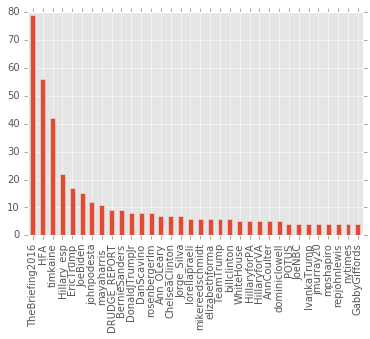

In [32]:
original_tweeter.value_counts().plot(kind='bar')

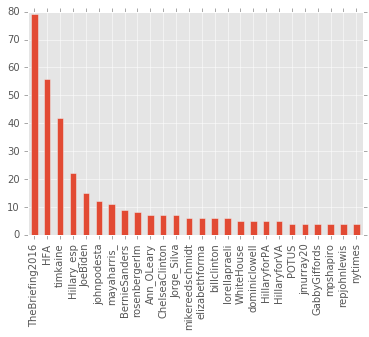

In [211]:
hillary,trump = data[data.handle == 'HillaryClinton'], data[data.handle == 'realDonaldTrump']

hillary_oa = hillary.groupby('original_author').original_author.filter(lambda x: len(x) > 3).value_counts().plot(kind='bar')

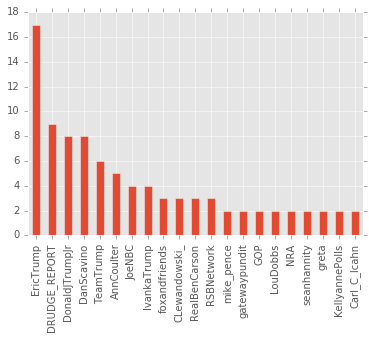

In [35]:
trump_oa = trump.groupby('original_author').original_author.filter(lambda x: len(x) > 1).value_counts().plot(kind='bar')

In [168]:
data.count()[:6]

id                 6444
handle             6444
text               6444
is_retweet         6444
original_author     722
time               6444
dtype: int64

In [38]:
# Split data between tweets, and retweets
retweets = data[data['is_retweet']==True]
tweets = data[data['is_retweet']==False]

In [39]:
retweets.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes was ""smart."" You know what I call it? Unpatriotic. https://t.co/t0xmBfj7zF",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'media': [{'display_url': 'pic.twitter.com/t0xmBfj7zF', 'sizes': {'medium': {'h': 512, 'resize': 'fit', 'w': 1024}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}, 'large': {'h': 512, 'resize': 'fit', 'w': 1024}, 'small': {'h': 340, 'resize': 'fit', 'w': 680}}, 'expanded_url': 'https://twitter.com/timkaine/status/780897748140847105/photo/1', 'indices': [112, 135], 'id': 780897660194742272, 'url': 'https://t.co/t0xmBfj7zF', 'source_status_id_str': '780897748140847105', 'source_user_id_str': '172858784', 'source_status_id': 780897748140847105, 'id_str': '780897660194742272', 'source_user_i...","{'media': [{'display_url': 'pic.twitter.com/t0xmBfj7zF', 'sizes': {'medium': {'h': 512, 'resize': 'fit', 'w': 1024}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}, 'large': {'h': 512, 'resize': 'fit', 'w': 1024}, 'small': {'h': 340, 'resize': 'fit', 'w': 680}}, 'expanded_url': 'https://twitter.com/timkaine/status/780897748140847105/photo/1', 'indices': [112, 135], 'id': 780897660194742272, 'url': 'https://t.co/t0xmBfj7zF', 'source_status_id_str': '780897748140847105', 'source_user_id_str': '172858784', 'source_status_id': 780897748140847105, 'id_str': '780897660194742272', 'source_user_i..."
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her vision and command during last night's debate showed that she's ready to be our next @POTUS.,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'name': 'President Obama', 'id': 1536791610, 'screen_name': 'POTUS', 'indices': [3, 9]}, {'id_str': '1339835893', 'name': 'Hillary Clinton', 'id': 1339835893, 'screen_name': 'HillaryClinton', 'indices': [37, 52]}], 'symbols': [], 'urls': [], 'hashtags': []}",NaN
9,780874710049550336,HillaryClinton,3) Has Trump offered a single proposal to reduce the friction of starting a business. @HillaryClinton has https://t.co/OhFAFEFsUq,True,mcuban,2016-09-27T21:00:13,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [{'id_str': '16228398', 'name': 'Mark Cuban', 'id': 16228398, 'screen_name': 'mcuban', 'indices': [3, 10]}, {'id_str': '1339835893', 'name': 'Hillary Clinton', 'id': 1339835893, 'screen_name': 'HillaryClinton', 'indices': [98, 113]}], 'symbols': [], 'urls': [], 'hashtags': []}",NaN
10,780869063648153601,HillaryClinton,"The election is just weeks away. Check if you're registered to vote at https://t.co/HcMAh8ljR0, only takes a few cl… https://t.co/H1H7hAA4XM",True,ddlovato,2016-09-27T20:37:47,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [{'id_str': '21111883', 'name': 'Demi Lovato', 'id': 21111883, 'screen_name': 'ddlovato', 'indices': [3, 12]}], 'symbols': [], 'urls': [{'display_url': 'IWillVote.com', 'expanded_url': 'http://IWillVote.com', 'indices': [85, 108], 'url': 'https://t.co/HcMAh8ljR0'}], 'hashtags': []}",NaN
11,780867418012979204,realDonaldTrump,"On National #VoterRegistrationDay, make sure you're registered to vote so we can #MakeAmericaGreatAgain… https://t.co/0wib6UEZON",True,GOP,2016-09-27T20:31:14,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,"{'user_mentions': [{'id_str': '11134252', 'name': 'GOP', 'id': 11134252, 'screen_name': 'GOP', 'indices': [3, 7]}], 'symbols': [], 'urls': [{'display_url': 'gop.cm/BCp82t', 'expanded_

In [164]:
pd.options.display.max_colwidth = 600

In [42]:
# Split tweets between Hillary and Trump
hillary_tweets = tweets[tweets['handle']!='realDonaldTrump']
trump_tweets = tweets[tweets['handle']=='realDonaldTrump']
trump_tweets.tail()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
6439,684219579548041218,realDonaldTrump,"""@lilredfrmkokomo: @realDonaldTrump My Facebook Groups are all voting TRUMP /4000 people! !!"" Great!",False,NaN,2016-01-05T03:47:14,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '26122621', 'name': 'Braggadocious', 'id': 26122621, 'screen_name': 'lilredfrmkokomo', 'indices': [1, 17]}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'id': 25073877, 'screen_name': 'realDonaldTrump', 'indices': [19, 35]}], 'symbols': [], 'urls': [], 'hashtags': []}",NaN
6440,684218836569206784,realDonaldTrump,"""@marybnall01: @realDonaldTrump watched lowell mass speech. Awesome. Great crowd. Make America Great Again!!!!!!""",False,NaN,2016-01-05T03:44:17,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '3477455725', 'name': 'marybnall01', 'id': 3477455725, 'screen_name': 'marybnall01', 'indices': [1, 13]}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'id': 25073877, 'screen_name': 'realDonaldTrump', 'indices': [15, 31]}], 'symbols': [], 'urls': [], 'hashtags': []}",NaN
6441,684218305100525569,realDonaldTrump,"""@ghosthunter_lol: Iowa key endorsement for @realDonaldTrump Can't wait for the Iowa caucus in 4 weeks! #Trump2016 https://t.co/JBfyFrZfFb""",False,NaN,2016-01-05T03:42:10,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'media': [{'display_url': 'pic.twitter.com/JBfyFrZfFb', 'sizes': {'thumb': {'h': 150, 'resize': 'crop', 'w': 150}, 'small': {'h': 255, 'resize': 'fit', 'w': 340}, 'large': {'h': 768, 'resize': 'fit', 'w': 1024}, 'medium': {'h': 450, 'resize': 'fit', 'w': 600}}, 'expanded_url': 'http://twitter.com/ghosthunter_lol/status/684198767730540545/photo/1', 'indices': [115, 138], 'id': 684198763573940224, 'url': 'https://t.co/JBfyFrZfFb', 'source_status_id_str': '684198767730540545', 'source_user_id_str': '596178928', 'source_status_id': 684198767730540545, 'id_str': '684198763573940224', 'source_u...","{'media': [{'display_url': 'pic.twitter.com/JBfyFrZfFb', 'sizes': {'thumb': {'h': 150, 'resize': 'crop', 'w': 150}, 'small': {'h': 255, 'resize': 'fit', 'w': 340}, 'large': {'h': 768, 'resize': 'fit', 'w': 1024}, 'medium': {'h': 450, 'resize': 'fit', 'w': 600}}, 'expanded_url': 'http://twitter.com/ghosthunter_lol/status/684198767730540545/photo/1', 'indices': [115, 138], 'id': 684198763573940224, 'url': 'https://t.co/JBfyFrZfFb', 'source_status_id_str': '684198767730540545', 'source_user_id_str': '596178928', 'source_status_id': 684198767730540545, 'id_str': '684198763573940224', 'source_u..."
6442,684217554861199360,realDonaldTrump,"""@iLoveiDevices: @EdwinRo47796972 @happyjack225 @FoxNews @krauthammer Minimizing dependency on China is crucial.Only Trump talks about that",False,NaN,2016-01-05T03:39:11,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '42568997', 'name': 'RA-Expression', 'id': 42568997, 'screen_name': 'iLoveiDevices', 'indices': [1, 15]}, {'id_str': '3291836573', 'name': 'Edwin Romero', 'id': 3291836573, 'screen_name': 'EdwinRo47796972', 'indices': [17, 33]}, {'id_str': '22722565', 'name': 'Deplorable Jack', 'id': 22722565, 'screen_name': 'happyjack225', 'indices': [34, 47]}, {'id_str': '1367531', 'name': 'Fox News', 'id': 1367531, 'screen_name': 'FoxNews', 'indices': [48, 56]}, {'id_str': '27744185', 'name': 'Charles Krauthammer', 'id': 27744185, 'screen_name': 'krauthammer', 'indices': [5...",NaN
6443,684216973815844866,realDonaldTrump,"""@SalRiccobono: @realDonaldTrump @troyconway Donald get big business back and# MAKE AMERICA GREAT AGAIN

In [43]:
# Clean tweet text, and form corpora for Trump and Hillary.

import re
from nltk.corpus import stopwords
stop = stopwords.words('english')

hillary_corpus = hillary_tweets.loc[:,['text']]
hillary_corpus['text'] = hillary_corpus['text'].apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
hillary_corpus['text'] = hillary_corpus['text'].str.lower()
hillary_corpus['text'] = hillary_corpus['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
trump_corpus = trump_tweets.loc[:,['text']]
trump_corpus['text'] = trump_corpus['text'].apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
trump_corpus['text'] = trump_corpus['text'].str.lower()
trump_corpus['text'] = trump_corpus['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [44]:
trump_corpus.head()

,text
5,join 3pm rally tomorrow mid america center council bluffs iowa tickets
8,government people join movement today
12,hillary clinton campaign continues make false claims foundation disclosure
13,cnbc time magazine online polls say donald trump first presidential debate via maga
15,great afternoon little havana hispanic community leaders thank support imwithyou


##### Some word frequency counts on Trump; All positive or neutral words; other than 'Crooked'

In [159]:

freq= pd.Series(' '.join(trump_corpus['text']).lower().split()).value_counts()[:100]
freq[:15]

trump                    696
thank                    519
great                    460
hillary                  356
amp                      256
makeamericagreatagain    245
people                   224
america                  211
clinton                  202
cruz                     201
new                      186
crooked                  185
make                     166
get                      137
big                      135
dtype: int64

In [157]:
trump_corpus['text'].sample(5)

1944                                                                                           crookedhillary
2821     senior united states district judge robert e payne today ruled favor trump campaign delegates argued
3996                                                                                    congratulations india
3375                                                       watch hillaryclinton support makeamericagreatagain
5671    watched incompetent mitt romney campaign strategist stuart stevens know mitt lost badly stevens clown
Name: text, dtype: object

In [48]:
trump_corpus['text'] = trump_corpus['text'].apply(lambda x: re.sub(r'\d+', '', x))

from sklearn.feature_extraction.text import CountVectorizer

word_vectors = CountVectorizer(ngram_range=(1,3), analyzer='word')

sparse_matrix = word_vectors.fit_transform(trump_corpus['text'])

frequencies = sum(sparse_matrix).toarray()[0]

trump_bigrams = pd.DataFrame(frequencies, index=word_vectors.get_feature_names(), columns=['frequency'])

In [49]:
look = trump_bigrams.sort(['frequency'])

C:\Users\Exped\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [171]:
look[-20:-10]

,frequency
like,114
make america,121
ted,134
big,135
get,137
hillary clinton,145
make,166
crooked hillary,175
crooked,185
new,186


### Creating a training and test corpus

In [175]:
import random

mega_corpus_filtered_text = []

for x in trump_corpus['text']:
    mega_corpus_filtered_text.append((x,'realDonaldTrump'))
for x in hillary_corpus['text']:
    mega_corpus_filtered_text.append((x,'HillaryClinton'))


random.shuffle(mega_corpus_filtered_text)

train = mega_corpus_filtered_text[:int((len(mega_corpus_filtered_text)*.8))]
test =mega_corpus_filtered_text[int((len(mega_corpus_filtered_text)*.8)):]

test[-50:-45]

[('bad economy women immigrants literally planet', 'HillaryClinton'),
 ('failing always take good story make bad every article unfair biased sad',
  'realDonaldTrump'),
 ('families struggling pay child care donald trump actually argued americans paid much',
  'HillaryClinton'),
 ('great poll florida thank', 'realDonaldTrump'),
 ('find votetrump caucus night iowa    iacaucus fitn trump',
  'realDonaldTrump')]

#### TextBlob was a pretty good NBC; very slow. We switch to Sci-kit's classifier.

In [139]:
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob

#Computational time for textblob model exceeds usefulness. Would not recommend

#model = NBC(train) 

#something = retweet_sources['text'].sample(100).apply(lambda x: str(model.classify(str(x))))


TextBlob('like omg becky i love this').sentiment
#print model.accuracy(test)

#type(train_text[1])

Sentiment(polarity=0.5, subjectivity=0.6)

In [140]:
trump_corpus.shape

(3093, 1)

#### Sklearn's support vector model has an 88% chance to successfully predict a tweet being from Trump or Hillary

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import classification_report
from sklearn import svm 

train_text,train_label,test_text,test_label = [],[],[],[]
for x in train:
    train_text.append(x[0])
    train_label.append(x[1])
for y in test:
    test_text.append(y[0])
    test_label.append(y[1])
vectorizer = TfidfVectorizer(min_df=4, max_df=0.9)
train_vectors = vectorizer.fit_transform(train_text)
test_vectors = vectorizer.transform(test_text)

model = svm.SVC(kernel='linear') 
model.fit(train_vectors, train_label) 
prediction = model.predict(test_vectors)
print (classification_report(test_label, prediction))

             precision    recall  f1-score   support

HillaryClinton       0.84      0.90      0.87       504
realDonaldTrump       0.92      0.86      0.89       641

avg / total       0.88      0.88      0.88      1145



#### Here we find all the twitter user IDs of everyone T~H retweeted

In [55]:

import ast
import json
#retweets['entities'].str.cat()
twitter_ids=[]
for x in retweets['entities']:
    info = x.replace('\'','\"')
    try:
        obj = json.loads(info)
        twitter_ids.append((obj['user_mentions'][0]['name'].encode('utf-8'),obj['user_mentions'][0]['screen_name'].encode('utf-8')))
    except:
        pass

In [56]:
twitter_ids = pd.DataFrame(twitter_ids).drop_duplicates()

In [58]:
hillary_retweets = retweets[retweets['handle']=='HillaryClinton']
trump_retweets = retweets[retweets['handle']=='realDonaldTrump']

In [59]:
twitter_ids[:5]

,0,1
0,Senator Tim Kaine,timkaine
1,President Obama,POTUS
2,Mark Cuban,mcuban
3,Demi Lovato,ddlovato
4,GOP,GOP


#### Twitter API rate limits; so we partition the user IDs into task list csv files, for each team member to data mine
##### Tweet getting script found at 'https://github.com/xkong100/Data620_Team3/blob/master/final_Project/Get%20tweets.ipynb'

In [60]:
#twitter_ids.to_csv(path_or_buf='./tweets/retweet_origin.csv',sep=',',index=False,header=['name','screen_name'])

task1,task2 = twitter_ids[:len(twitter_ids)/4],twitter_ids[(len(twitter_ids)/4)+1:len(twitter_ids)/2]

task3,task4 = twitter_ids[(len(twitter_ids)/2)+1:(len(twitter_ids)/4)*3],twitter_ids[((len(twitter_ids)/4)*3)+1:]

tasks = [task1,task2,task3,task4]

In [ ]:
count = 1
for task in tasks:
    task.to_csv(path_or_buf='./tweets/task'+str(count)+'.csv',sep=',',index=False,header=['name','screen_name'])
    count += 1

In [212]:
#A naive baiyes sentiment analyzer demo - there are better options
import nltk
from nltk.sentiment import * 
print (nltk.sentiment.util.demo_liu_hu_lexicon('i think you\'re a great person'))

Positive
None


#### Gather all tweets mined by Team 3; found at 'https://github.com/xkong100/Data620_Team3/tree/master/final_Project/retweets'
###### Create dataframe with 133k Tweets tweeted by those T~H retweeted.

In [62]:
import os
retweet_source_path = os.getcwd()+'/tweets/'

files_to_read = os.listdir(retweet_source_path)

In [63]:
retweet_sources = pd.DataFrame()
for filename in files_to_read[:len(files_to_read)/2]:
    print filename
    exp = pd.read_csv(retweet_source_path+filename,index_col=False,sep=';',names=['timestamp','sn','text'],header=0)
    retweet_sources = pd.concat([retweet_sources, exp], ignore_index=True)

ABC News Politics.csv
ABC News.csv
Adriana Cohen.csv
AFL-CIO.csv
Al Gore.csv
Alicia Machado.csv
Amanda Renteria.csv
Andra Day.csv
Andrew Jenks.csv
Ann Coulter.csv
Austin Hunt.csv
Barack Obama.csv
Barbara Boxer.csv
Barbara Kinney.csv
Ben Kesling.csv
Ben Shapiro.csv
Ben Smith.csv
Ben White.csv
Bernie Sanders.csv
Bill Clinton.csv
Bishop Garrison.csv
Bret Easton Ellis.csv
Brian Fallon.csv
Business Insider.csv
BuzzFeed.csv
Cameron Esposito.csv
Carl Icahn.csv
CBS Evening News.csv
CBS News.csv
Chad Griffin.csv
Chelsea Clinton.csv
Chris Murphy.csv
Christina Reynolds.csv
Claire McCaskill.csv
Clinton Foundation.csv
CNBC Now.csv
CNBC Opinion.csv
CNN Politics.csv
CNN.csv
College Democrats.csv
Congressman Tim Ryan.csv
Constance Zimmer.csv
Corey R. Lewandowski.csv
CWA.csv
Dallas Morning News.csv
Dan Malloy.csv
Daniel Scavino Jr..csv
Darren Jordan.csv
David Fahrenthold.csv
David Martosko.csv
Deadspin.csv
DemConvention.csv
Demi Lovato.csv
Deplorable Scavino.csv
Dispatch Politics.csv
Dominic Lowell.csv

In [64]:
retweet_sources.shape

(132950, 3)

In [65]:
retweet_sources.sample(5)

,timestamp,sn,text
125747,2016-02-04 03:38:58,jmpalmieri,"@HillaryClinton...practice the discipline of gratitude, be grateful for your limitations."
115689,2016-07-19 21:08:09,HillaryforVA,"RT @MollyIngalls: During Operation Registration, we register EVERYONE - even the pizza guy #VirWINia #StrongeR2gether https://t.co/XhlV5ghd…"
101590,2016-08-13 17:50:32,HillaryforMI,RT @HillaryClinton: We need to make sure every American has high-speed internet access. And we will: https://t.co/jAszaFw1t3 https://t.co/f…
7274,2016-12-03 02:34:53,AustinHunt,RT @joshgreenman: BuzzFeed goes with the technical term of how Trump's Taiwan conversation could impact U.S.-China relations. https://t.co/…
73045,2017-01-04 19:30:02,GabbyGiffords,Excited to be back on Capitol Hill today to meet w/lawmakers &amp; discuss how we can reduce gun violence &amp; make our communities safer in 2017.


##### Set up Vader Sentiment Analyzer by NLTK

In [67]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [215]:
testing1 = sid.polarity_scores('I have a very secret plan to defeat ISIS in 30 days')
testing2 = sid.polarity_scores('30% of America is a basket of deplorables')
testing1['compound'],testing2['compound']

(-0.4588, 0.0)

In [268]:
trumpSentimentVader = trump_corpus['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
hillarySentimentVader = hillary_corpus['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

##### It would appear that Trump's tweets are more positive than Hillary's tweets 

In [271]:
trumpSentimentVader.mean(),hillarySentimentVader.mean()

(0.16365990947300352, 0.10062696842906073)

In [203]:
# Creates the networks of T~H, everyone they retweeted from
hillary_network,trump_network = [],[]
for index,retweet in retweets.iterrows():
    if retweet['handle']== 'HillaryClinton':
        hillary_network.append(str(retweet['original_author']))
    if retweet['handle']=='realDonaldTrump':
        trump_network.append(str(retweet['original_author']))
trump_network = list(set(trump_network))
hillary_network = list(set(hillary_network))

In [179]:
hillary_network[:2]

['ChrisMurphyCT', 'algore']

In [70]:
retweet_sources['text'] = retweet_sources['text'].apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",str(x)).split()))
retweet_sources['text'] = retweet_sources['text'].str.lower()
retweet_sources['text'] = retweet_sources['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [123]:
retweet_sources.sample(1)

,timestamp,sn,text
82162,2016-08-02 14:57:30,gwenrocco,gives donald trump four pinocchios revisionist history mocking disabled reporter


#### Brace yourself; code bombardment incoming with explanation below!

In [204]:


for idx,names in enumerate(hillary_network):
    portion = retweet_sources[retweet_sources['sn']==names]
    portion['SA'] = portion['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
    hillary_network[idx] = (names, portion['SA'].mean())
    
for idx,names in enumerate(trump_network):
    portion = retweet_sources[retweet_sources['sn']==names]
    portion['SA'] = portion['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
    trump_network[idx] = (names, portion['SA'].mean())

C:\Users\Exped\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Exped\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [205]:
hillary_network = [i for i in hillary_network if math.isnan(i[1])==False]
trump_network = [i for i in trump_network if math.isnan(i[1])==False]

In [206]:
from collections import Counter
for index, name in enumerate(hillary_network):
    exp_vector = vectorizer.transform(retweet_sources[retweet_sources['sn']==name[0]]['text'])
    prediction = model.predict(exp_vector)
    b = Counter(prediction)
    hillary_network[index] = (name[0],name[1],b.most_common(1)[0])

for index, name in enumerate(trump_network):
    exp_vector = vectorizer.transform(retweet_sources[retweet_sources['sn']==name[0]]['text'])
    prediction = model.predict(exp_vector)
    b = Counter(prediction)
    trump_network[index] = (name[0],name[1],b.most_common(1)[0])


In [155]:
hill_network_RT,trump_network_RT = [],[]
for index, retweet in retweets.iterrows():
    if retweet['handle'] == 'HillaryClinton':
        hill_network_RT.append((retweet['original_author'],sid.polarity_scores(retweet['text'])['compound']))
    if retweet['handle'] == 'realDonaldTrump':
        trump_network_RT.append((retweet['original_author'],sid.polarity_scores(retweet['text'])['compound']))

In [ ]:
for rt in hill_network_RT:
    

#### T~H_network_retweets are lists of every author T~H retweeted from; with the average

In [219]:
hill_network_RT[:6],'                          ',trump_network_RT[:6]

([('timkaine', 0.0),
  ('POTUS', 0.185),
  ('mcuban', 0.0),
  ('ddlovato', 0.0),
  ('shondarhimes', 0.1935),
  ('Hillary_esp', -0.1531)],
 '                          ',
 [('GOP', 0.3182),
  ('TeamTrump', 0.4019),
  ('TeamTrump', 0.5473),
  ('TeamTrump', 0.3832),
  ('DanScavino', 0.0),
  ('TeamTrump', 0.8283)])

In [255]:
hillary_network[20:30],'                                                 ',trump_network[-10:]

([('EconomicPolicy', 0.06601491739552956, ('HillaryClinton', 1602)),
  ('SenWarren', -0.001467886658795735, ('HillaryClinton', 486)),
  ('HillaryforFL', 0.2116550262029538, ('HillaryClinton', 1690)),
  ('DanMalloyCT', 0.20632712328767103, ('HillaryClinton', 245)),
  ('HillaryforUT', 0.2512392207792207, ('HillaryClinton', 586)),
  ('funnyordie', 0.11098360995850602, ('HillaryClinton', 605)),
  ('gwenrocco', 0.09594936775553213, ('HillaryClinton', 1335)),
  ('Everytown', -0.09767432082794358, ('HillaryClinton', 1264)),
  ('SenSanders', 0.02462413178984858, ('HillaryClinton', 1831)),
  ('HamiltonMusical', 0.20907252931323286, ('HillaryClinton', 1260))],
 '                                                 ',
 [('FieldofFight', 0.04001372727272733, ('HillaryClinton', 588)),
  ('GeraldoRivera', 0.05537268571428564, ('realDonaldTrump', 1065)),
  ('ErinBurnett', 0.060995770392749254, ('HillaryClinton', 184)),
  ('GovMikeHuckabee', 0.12609224629418458, ('realDonaldTrump', 453)),
  ('robertjeffre

In [256]:
SA = pd.Series()
for index,x in enumerate(hillary_network):
    if x[1] > 0:
        SA.set_value(index,1)
    else:
        SA.set_value(index,0)
SA.value_counts()

1    65
0     6
dtype: int64

In [251]:
hillaryGraph = pd.Series()
for index,x in enumerate(hillary_network):
    hillaryGraph.set_value(index,x[2][0])

trumpGraph = pd.Series()
for index,x in enumerate(trump_network):
    trumpGraph.set_value(index,x[2][0])    

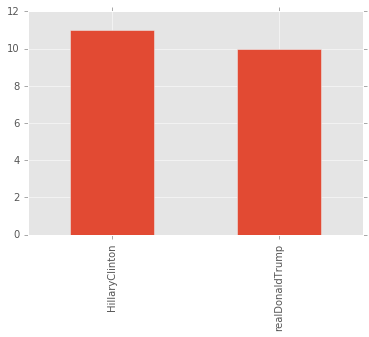

In [252]:
trumpGraph.value_counts().plot(kind='bar')

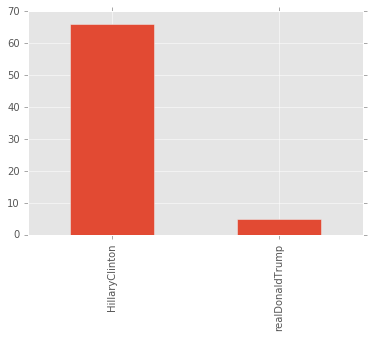

In [253]:
hillaryGraph.value_counts().plot(kind='bar')

#### What can we observe from the data exploration? All bullets can be prefaced with 'In 2016'

* Trump chooses to retweet from sources that are positive. (Every single source from his retweet network has positive SA)
* Hillary tends to retweet from sources that are positive, however 8.5% of her sources are negative!
* Trump's tweets are 160% more positive than Hillary's; we predict it might have something to do with the trump slogan
* Almost everyone in Hillary's retweeting network speaks similar to Hillary, as opposed to Trump.
* Trump's retweeting network tends to speak equally between likeness of Hillary, and Trump.

##### Conclusion : During the 2016 Election; Trump's selection of retweets came from a more closeknit circle, of diverse speakers using more positive sentiment than Hillary's selection of people to retweet.